# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')

# Loading the dataset

In [2]:
# Load the data
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Summarizing the data

In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['Sepal_length ', 'Sepal_width', 'Petal_length', 'Petal_width',
       'Species'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sepal_length   150 non-null    float64
 1   Sepal_width    150 non-null    float64
 2   Petal_length   150 non-null    float64
 3   Petal_width    150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isnull().sum()

Sepal_length     0
Sepal_width      0
Petal_length     0
Petal_width      0
Species          0
dtype: int64

In [9]:
data.corr()

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


In [10]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualizing the data


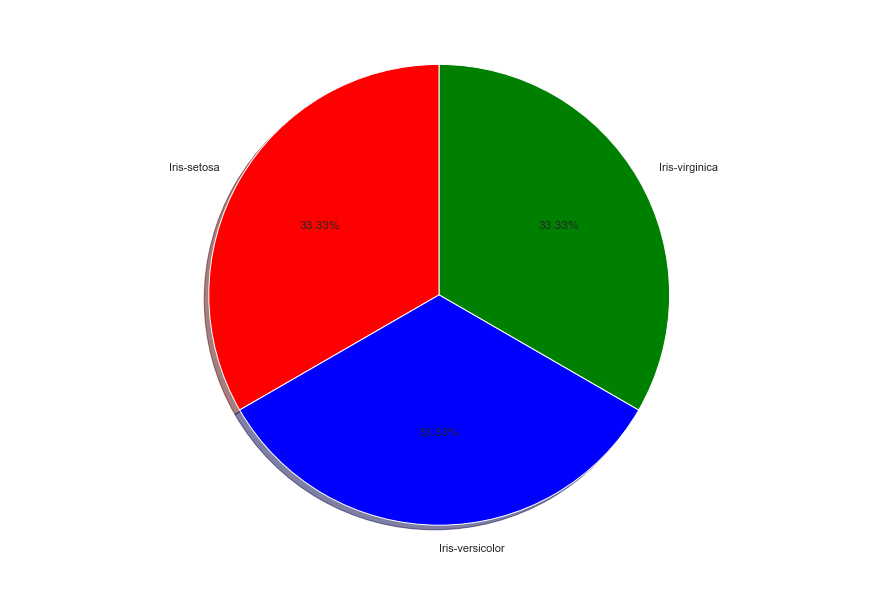

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['red','blue','green']
sp = data['Species'].unique()
ct = data['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
plt.show()


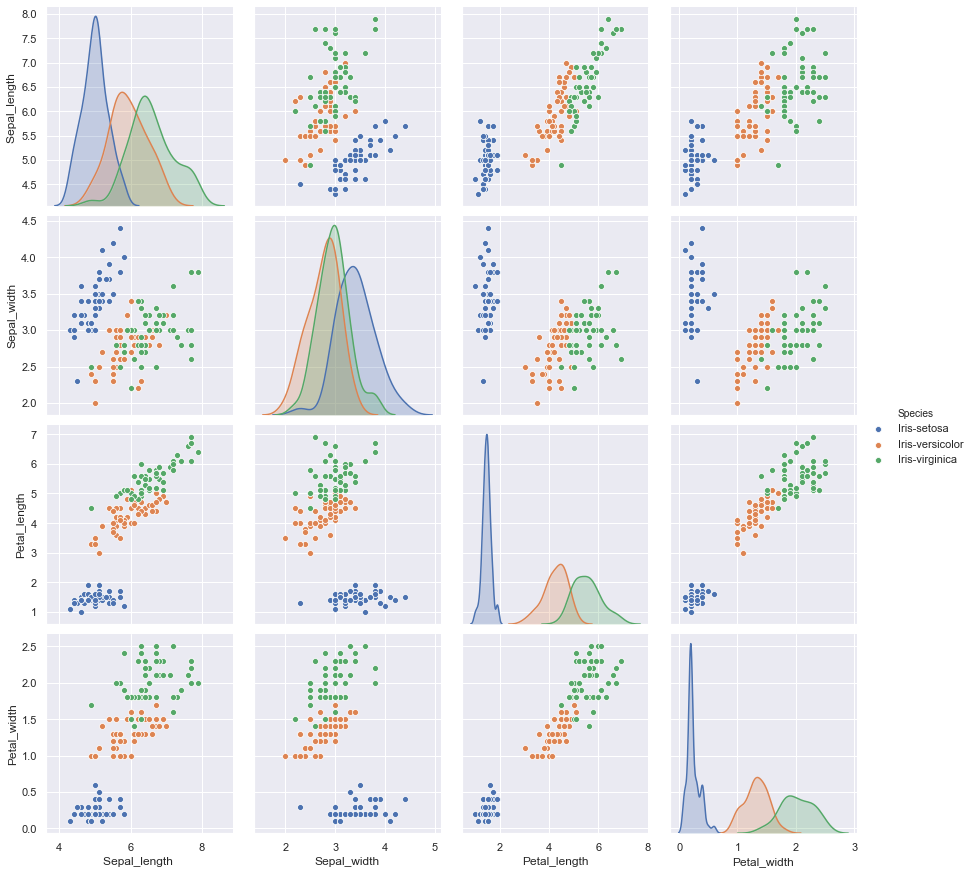

In [12]:
sns.pairplot(data, hue='Species', height=3)
plt.show()

# Box and Whisker Plot

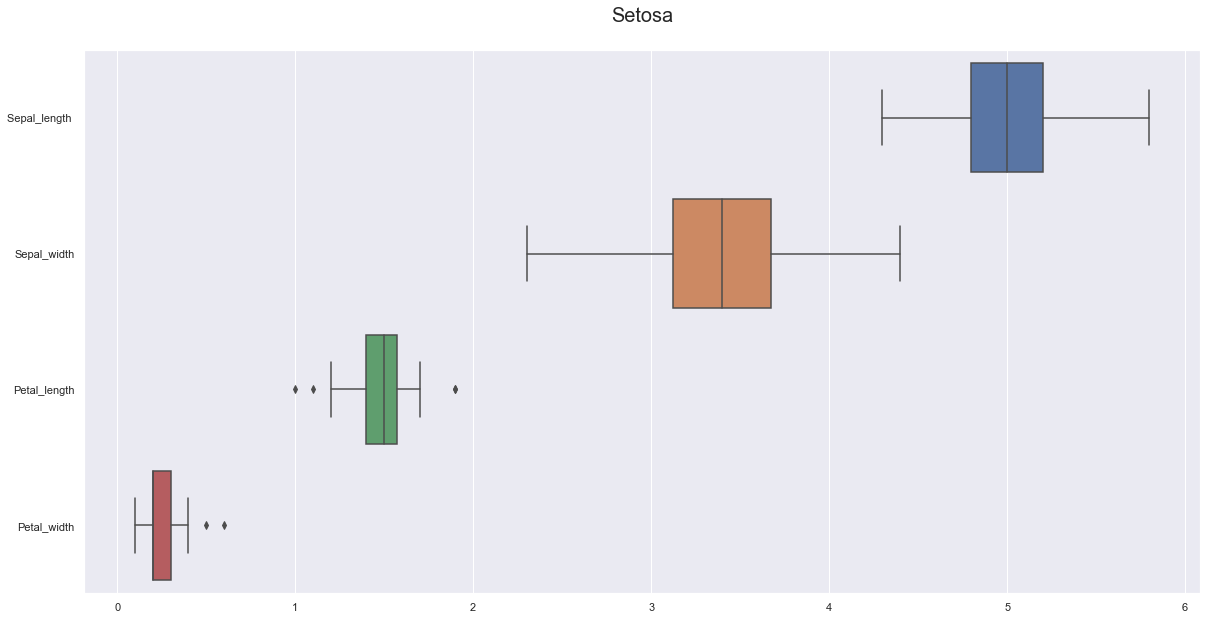

In [13]:
plt.figure(figsize=(20,10))
setosa = data[data['Species'] == "Iris-setosa"]
bp = sns.boxplot(data = setosa, orient="h")
bp.set_title("Setosa\n", fontsize = 20)
plt.show()

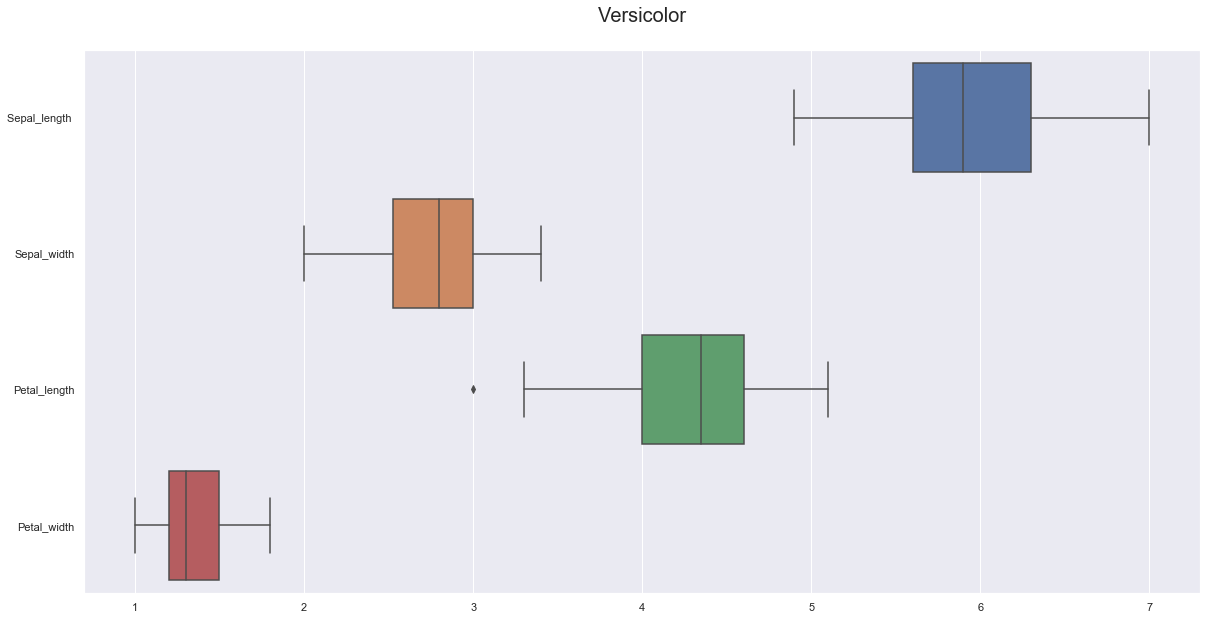

In [14]:
plt.figure(figsize=(20, 10))
versicolor = data[data['Species'] == "Iris-versicolor"]
bp = sns.boxplot(data = versicolor, orient="h")
bp.set_title("Versicolor\n", fontsize = 20)
plt.show()

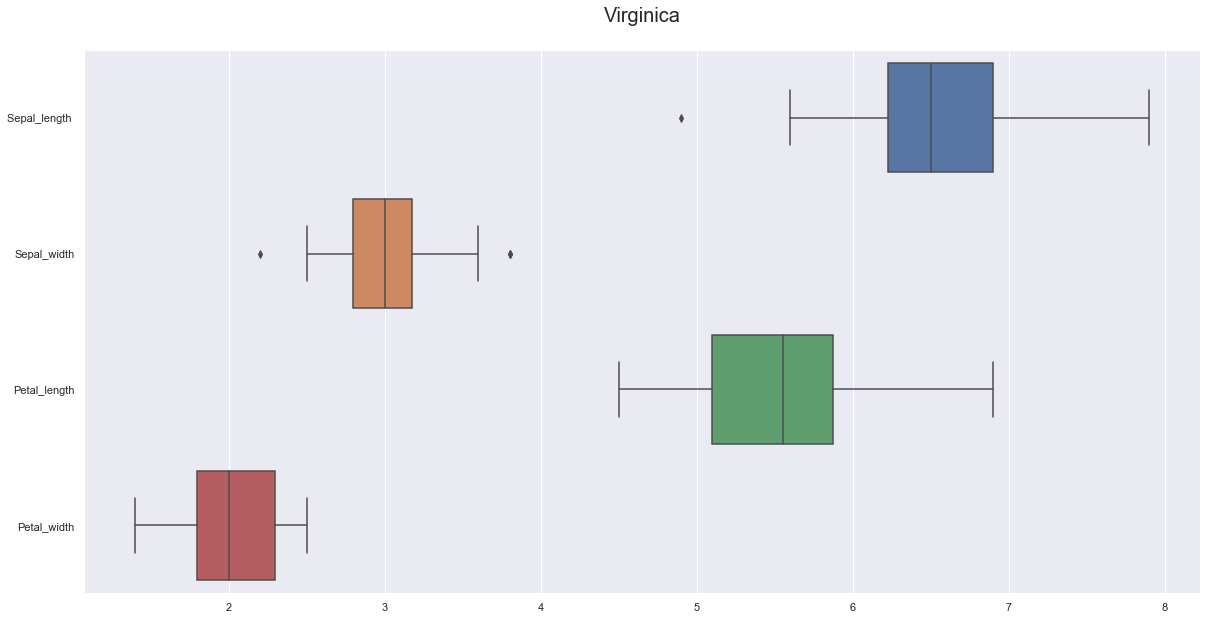

In [15]:
plt.figure(figsize=(20, 10))
virginica = data[data['Species'] == "Iris-virginica"]
bp = sns.boxplot(data = virginica, orient="h")
bp.set_title("Virginica\n", fontsize = 20)
plt.show()

# Histogram

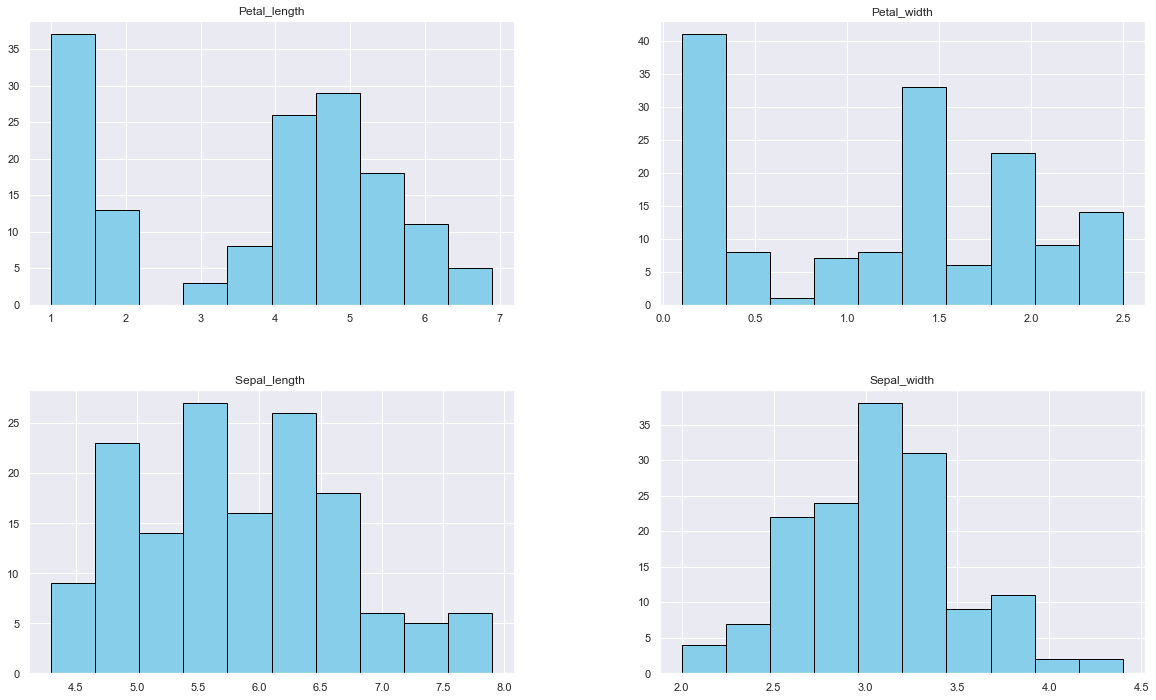

In [16]:
fig = plt.figure(figsize=(20, 12))
data.hist(ax = fig.gca(), color="skyblue", edgecolor="black")
plt.show()

# Scatter Plot

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(setosa['Sepal_length'], setosa['Sepal_width'], c="red", label="Setosa")
plt.scatter(versicolor['Sepal_length'],versicolor['Sepal_width'], c="blue", label="Versicolor")
plt.scatter(virginica['Sepal_length'],virginica['Sepal_width'], c="green", label="Virginica")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width\n", fontsize=20)
plt.legend()
plt.show()

KeyError: 'Sepal_length'

<Figure size 1440x720 with 0 Axes>

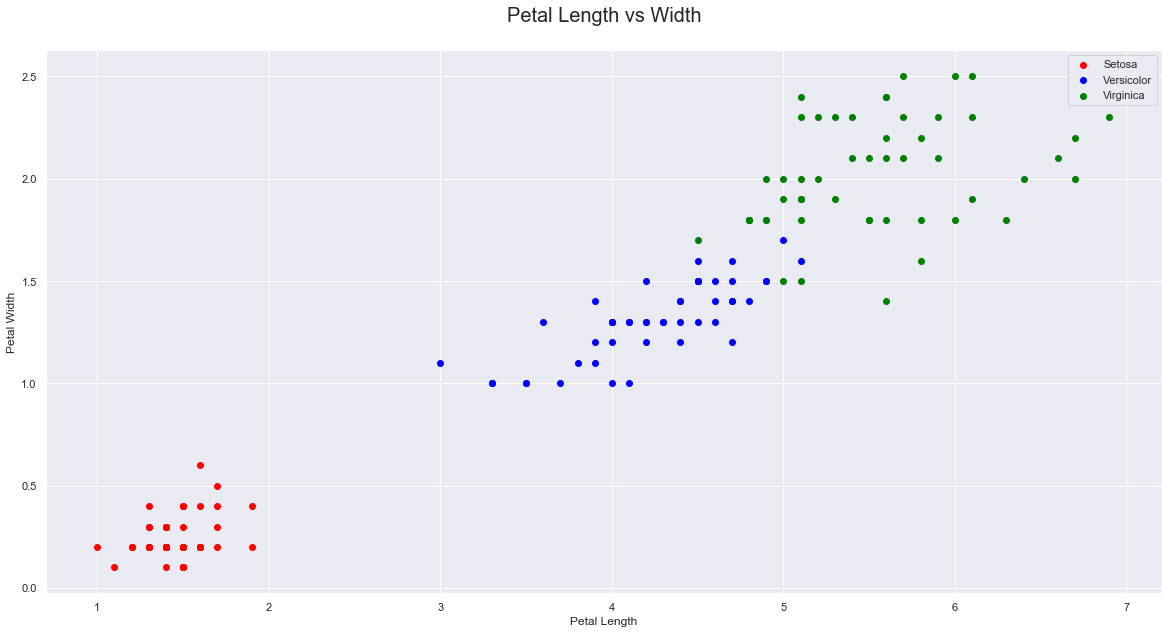

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(setosa['Petal_length'], setosa['Petal_width'], c="red", label="Setosa")
plt.scatter(versicolor['Petal_length'],versicolor['Petal_width'], c="blue", label="Versicolor")
plt.scatter(virginica['Petal_length'],virginica['Petal_width'], c="green", label="Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Width\n", fontsize=20)
plt.legend()
plt.show()

# Correlation Matrix

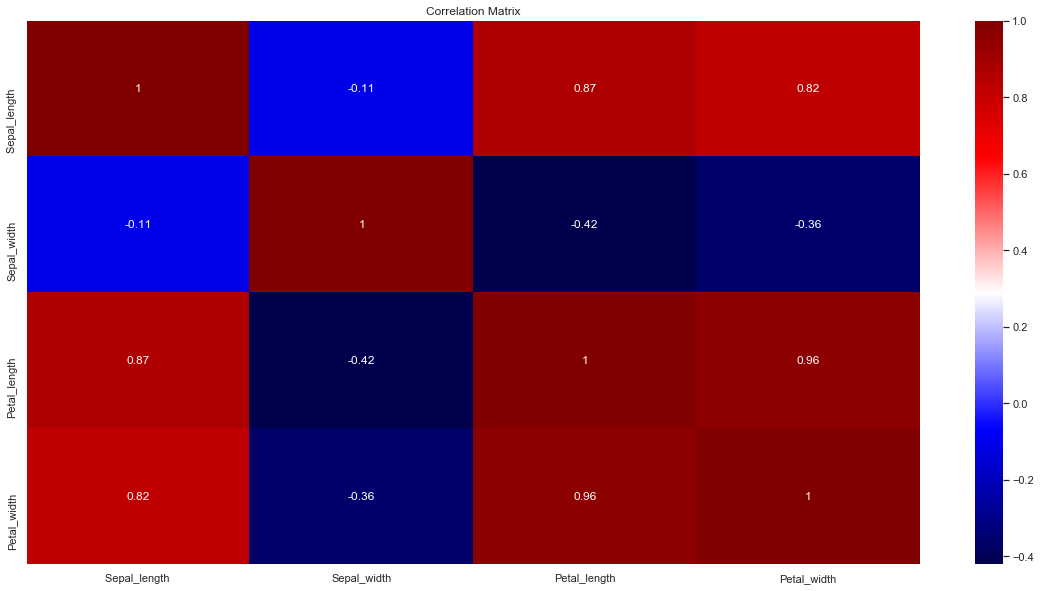

In [19]:
plt.figure(figsize=(20, 10))
corr_mat = data.corr()
cm = sns.heatmap(corr_mat, annot=True, cmap="seismic")
cm.set_title("Correlation Matrix")
plt.show()

# Encoding the categorical dependent variable

In [20]:
X = data.drop(['Species'], 1)
y = data['Species']
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the dataset into training set and testing set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Selecting the models

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Train the models 

In [24]:
models = [lr, knn, svm, nb, dt, rf]
scores = []
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))
  print("Accuracy of " + type(model).__name__ + " is", accuracy_score(y_test, y_pred))

Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 0.9333333333333333
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of RandomForestClassifier is 0.9555555555555556


# Evaluating the models

In [25]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Accuracy': scores})

results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.977778
1     K-Nearest Neighbors  0.977778
2  Support Vector Machine  0.977778
4           Decision Tree  0.955556
5           Random Forest  0.955556
3             Naive Bayes  0.933333
